Maintenant, je souhaite connaître le montant total des achats 

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [130]:
vc = pd.read_csv('ventes_clean.csv')
pc = pd.read_csv('produits_clean.csv')
clients = pd.read_csv('clients.csv')

In [131]:
vc

,Unnamed: 0,id_prod,date,session_id,client_id
0,0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242
...,...,...,...,...,...
336811,337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454
336812,337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268
336813,337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137
336814,337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5


In [132]:
pc

,Unnamed: 0,id_prod,price,categ
0,0,0_1421,19.99,0
1,1,0_1368,5.13,0
2,2,0_731,17.99,0
3,3,1_587,4.99,1
4,4,0_1507,3.99,0
...,...,...,...,...
3281,3282,2_23,115.99,2
3282,3283,0_146,17.14,0
3283,3284,0_802,11.22,0
3284,3285,1_140,38.56,1


In [133]:
# pour pouvoir obtenir ma clonne, je dois lier les 2 tables sur les id produits 
tt_vc = vc.merge(pc, how='left', left_on='id_prod', right_on='id_prod')
tt_vc

,Unnamed: 0_x,id_prod,date,session_id,client_id,Unnamed: 0_y,price,categ
0,0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,1897.0,4.99,0.0
1,1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,289.0,65.75,2.0
2,2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,221.0,10.71,1.0
3,3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,446.0,4.20,0.0
4,4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,1024.0,8.99,0.0
...,...,...,...,...,...,...,...,...
336811,337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,625.0,31.99,1.0
336812,337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,2467.0,22.99,0.0
336813,337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,565.0,11.03,0.0
336814,337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,2274.0,50.99,2.0


In [134]:
# étendue des dates : de mars 2021 au 28 février 2022

In [135]:
tt_vc['price'].sum()
# le total des ventes représente 5 796 577 euros de mars 2021 au 28 février 2022

5796577.770000001

Maintenant, je souhaite connaître la fréquence d’achat : le nombre d'achats par mois

In [136]:
a = pd.DataFrame(tt_vc["date"])
a.dtypes
# dtype objet = str

date    object
dtype: object

In [137]:
a['date'] = pd.to_datetime(tt_vc.date)
a['date']

0        2021-04-10 18:37:28.723910
1        2022-02-03 01:55:53.276402
2        2021-09-23 15:13:46.938559
3        2021-10-17 03:27:18.783634
4        2021-07-17 20:34:25.800563
                    ...            
336811   2021-05-28 12:35:46.214839
336812   2021-06-19 00:19:23.917703
336813   2021-03-16 17:31:59.442007
336814   2021-10-30 16:50:15.997750
336815   2021-06-26 14:38:19.732946
Name: date, Length: 336816, dtype: datetime64[ns]

In [138]:
tt_vc["date"].values[0]
# j'affiche la première ligne de la série 

'2021-04-10 18:37:28.723910'

Text(0.5, 1.0, "Quantité d'achats par mois")

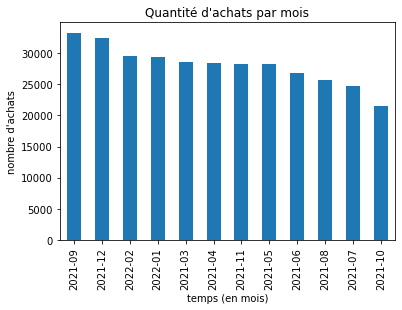

In [142]:
a['date'].apply( lambda x : x.strftime('20%y-%m')).value_counts().plot.bar()
plt.xlabel("temps (en mois)")
plt.ylabel("nombre d'achats")
plt.title("Quantité d'achats par mois")


analyse : Le nombre de ventes le plus important a eu lieu en septembre et en 
    décembre, ce qui correspond à la rentrée littéraire et qui est logique. 
    Le nombre de ventes reste stable ensuite et décroit pour les périodes de grandes vacances. 
    Le mois le plus creu est octobre, on peut penser que c'est suite aux importants achats de la rentrée. 

Maintenant je vais me concentrer sur la répartition des tarifs  par catégories


In [143]:
modalite = tt_vc["categ"].unique()

modalite = list(modalite)
del modalite[3]

modalite

# modalite avait un élèment nan à enlever 

[0.0, 2.0, 1.0]

In [144]:
groupes = []
for m in modalite:
    groupes.append(tt_vc[tt_vc['categ']==m]['price'])
groupes

[0          4.99
 3          4.20
 4          8.99
 5          3.99
 6          8.03
           ...  
 336806     3.99
 336809    11.99
 336812    22.99
 336813    11.03
 336815    17.99
 Name: price, Length: 209426, dtype: float64,
 1          65.75
 27         68.99
 73         54.87
 111        82.99
 132        60.96
            ...  
 336679     43.99
 336730     41.31
 336795     87.40
 336800    181.99
 336814     50.99
 Name: price, Length: 17552, dtype: float64,
 2         10.71
 15        23.99
 16        14.99
 20        15.99
 23        25.79
           ...  
 336802    23.99
 336807    23.20
 336808    17.99
 336810    23.37
 336811    31.99
 Name: price, Length: 109735, dtype: float64]

Text(0.5, 1.0, 'Prix des articles en fonction de leur catégorie')

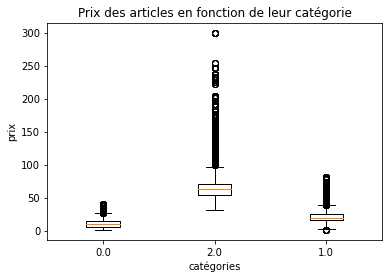

In [147]:
plt.boxplot(groupes, labels = modalite)
plt.xlabel("catégories")
plt.ylabel("prix")
plt.title("Prix des articles en fonction de leur catégorie")

analyse : les prix les plus bas se trouvent dans la catégorie 0 et ne dépassent pas les 50 euros.
    La catégorie 1 commence légèrement plus haut et monte jusqu'à 100 euros 
    Les prix de la catégorie 2 vont d'une 40 aine d'euros à 300 euros. 
    On note que plus les catégories montent en gamme de prix, plus la distribution des prix est importante. 
    Les outliers ne sont pas si étonnants, il font simplement référence à une petite quantité de prix se situant au dessus du
    75e percentile. Encore une fois, plus les gammes de prix sont élevées, plus leur distribuion est importante. 